# Supernovas

Para esta actividad, se van a calcular las distancias a las supernovas en función del corrimiento al rojo. Fue muy triste puesto que no pude instalar la libreria CosmoloPy en mi computadora, por lo que para este ejericio utilicé Google Colab

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cosmolopy.distance as cod
from scipy.optimize import minimize

In [0]:
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-seguragg2018/master/datos/jla_lcparams.txt

In [99]:
data = pd.read_csv('jla_lcparams.txt', sep=' ')
data

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
0,03D1au,0.503084,0.504300,0,23.001698,0.088031,1.273191,0.150058,-0.012353,0.030011,9.517000,0.110500,52909.745220,0.214332,0.000790,0.000440,-0.000030,1,36.043210,-4.037469,0.001697
1,03D1aw,0.580724,0.582000,0,23.573937,0.090132,0.974346,0.273823,-0.025076,0.036691,9.169000,0.088000,52902.898002,0.352732,0.002823,0.000415,0.001574,1,36.061634,-4.517158,0.000843
2,03D1ax,0.494795,0.496000,0,22.960139,0.088110,-0.728837,0.102069,-0.099683,0.030305,11.580000,0.112500,52915.923670,0.111634,0.000542,0.000475,-0.000024,1,36.097287,-4.720774,0.001692
3,03D1bp,0.345928,0.347000,0,22.398137,0.087263,-1.155110,0.112834,-0.040581,0.026679,10.821000,0.123500,52920.249015,0.102828,0.001114,0.000616,0.000295,1,36.657235,-4.838779,-0.000270
4,03D1co,0.677662,0.679000,0,24.078115,0.098356,0.618820,0.404295,-0.039380,0.067403,8.647000,0.284000,52954.458342,0.454715,0.011857,0.000780,0.005898,1,36.567748,-4.935050,-0.002855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,sn2007co,0.027064,0.026962,0,16.504006,0.141685,-0.137806,0.061153,0.105288,0.020382,10.519608,0.280891,54265.212054,0.056635,0.000095,0.000377,0.000007,3,275.765000,29.897050,-0.009803
736,sn2007cq,0.025468,0.025918,0,15.797848,0.143429,-0.657941,0.115645,-0.060805,0.025820,9.704507,0.280891,54281.025669,0.070944,0.000392,0.000639,0.000075,3,333.668430,5.080160,-0.009575
737,sn2007f,0.023810,0.023590,0,15.895501,0.144315,0.618766,0.041400,-0.055411,0.026006,10.027000,0.118500,54124.058397,0.045234,-0.000055,0.000645,-0.000180,3,195.812750,50.618760,-0.009361
738,sn2007qe,0.023867,0.024000,0,16.068268,0.144350,0.760605,0.045650,0.052186,0.026200,6.000000,5.000000,54429.852171,0.037486,0.000101,0.000654,-0.000076,3,358.553990,27.409170,-0.009368


$\mu = m_B^* -(M_B-a \times X_1 \times \beta \times C)$

## Mu observado

In [0]:
func = np.zeros(740)
def mus(w):
    for i in range(740):
        func[i] = data.iloc[i,4]-(w[2]-w[0]*data.iloc[i,6]*w[1]*data.iloc[i,8])
    return func

In [0]:
a =  0.141
b = 3.101
mb = -19.05
w = [0.1, 3, -19, 0.5]

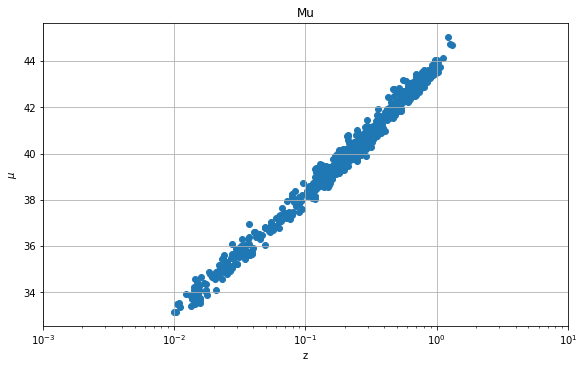

In [113]:
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)

plt.scatter(data['zcmb'],mus(w))
plt.xscale('log')
plt.xlim(0.001,10)

plt.title('Mu')
plt.xlabel('z')
plt.ylabel('$\mu$')

plt.grid()
plt.show()

## Utilizando CosmoloPy


In [0]:
zcmb = data['zcmb']

In [0]:
def mu_teorico(w):
    cosmo = {"omega_M_0":w[3],
            "omega_lambda_0":1-w[3],
            "omega_k_0":0.0,
            "h":0.7}
    return 5*np.log10(cod.luminosity_distance(data["zcmb"], **cosmo)*1e6/10)

In [0]:
mut = mu_teorico(w)

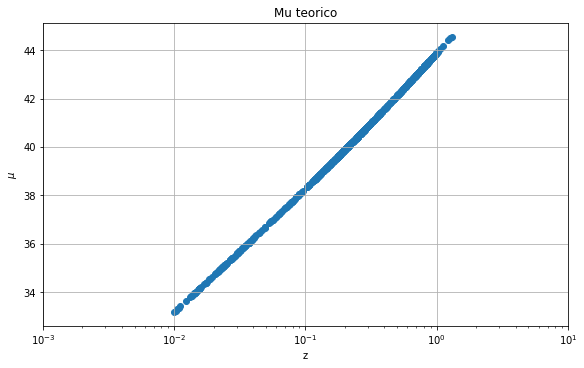

In [114]:
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)

plt.scatter(data['zcmb'],mt)
plt.xscale('log')
plt.xlim(0.001,10)

plt.title('Mu teorico')
plt.xlabel('z')
plt.ylabel('$\mu$')

plt.grid()
plt.show()

Importamos las matrices de covarianza para determinar el error asociado

In [0]:
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-seguragg2018/master/datos/jla_v0_covmatrix.dat
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-seguragg2018/master/datos/jla_v0a_covmatrix.dat
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-seguragg2018/master/datos/jla_v0b_covmatrix.dat
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-seguragg2018/master/datos/jla_va_covmatrix.dat
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-seguragg2018/master/datos/jla_vab_covmatrix.dat
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-seguragg2018/master/datos/jla_v_covmatrix.dat

In [0]:
mav0a = pd.read_csv("jla_v0a_covmatrix.dat", sep=" ").to_numpy().reshape(740, 740)
mav0b = pd.read_csv("jla_v0b_covmatrix.dat", sep=" ").to_numpy().reshape(740, 740)
mav0 = pd.read_csv("jla_v0_covmatrix.dat", sep=" ").to_numpy().reshape(740, 740)
mavab = pd.read_csv("jla_vab_covmatrix.dat", sep=" ").to_numpy().reshape(740, 740)
mava = pd.read_csv("jla_va_covmatrix.dat", sep=" ").to_numpy().reshape(740, 740)
mavb = pd.read_csv("jla_vb_covmatrix.dat", sep=" ").to_numpy().reshape(740, 740)

In [0]:
covMa = mav0a + mav0b + mav0 + mavab + mava + mavb
mainv = np.linalg.inv(covMa)
error = np.zeros(740)
for i in range(740):
    error[i] = np.sqrt(covMa[i][i])

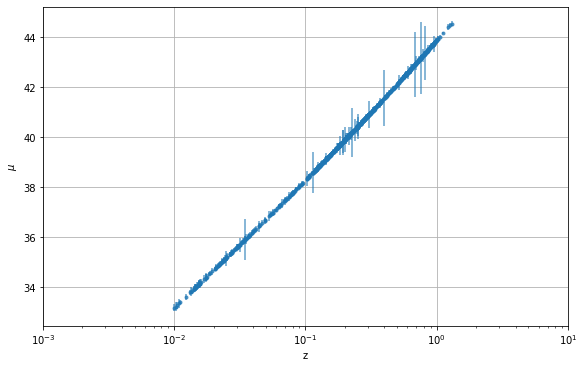

In [110]:
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)

#plt.scatter(data['zcmb'],mt)
plt.errorbar(data['zcmb'], mt, yerr=error, fmt=".", alpha=0.7)
plt.xscale('log')
plt.xlim(0.001,10)

plt.xlabel('z')
plt.ylabel('$\mu$')

plt.grid()

## $Chi^2$

In [111]:
def chi(w):
    m = mus(w)
    mut = mu_teorico(w)
    return abs(np.matmul(np.matmul((m-mut).T, mainv),(m-mut)))

parametro = [0.1, 3, -19, 0.5]
chi(parametro)

8723961.543904062

In [112]:
minimize(chi, w, bounds = ((0, 1), (2.5, 3.5), (-19.5, -18.5), (0, 1)))

      fun: 8298155.708681399
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([2743937.44766712,       0.        ,   -4717.70763397,
        -13265.66562057])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 10
      nit: 1
   status: 0
  success: True
        x: array([  0. ,   2.5, -18.5,   1. ])